<a href="https://colab.research.google.com/github/MK316/Workingpapers/blob/main/ksat_dataprocess_items.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KSAT data process (as of 0924)

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/MK316/Workingpapers/main/Analysis/ksatdata_nocontraction.csv'
df1 = pd.read_csv(url)

In [3]:
df1

,Year,Category,QN,Passage
0,2022,Context,Q18,"Dear Ms. Green,\nMy name is Donna Williams, a ..."
1,2022,Context,Q19,It was Evelyn_s first time to explore the Badl...
2,2022,Context,Q20,when they first consider experimenting with so...
3,2022,Context,Q22,"Environmental hazards include biological, phys..."
4,2022,Context,Q23,Scientists use paradigms rather than believing...
...,...,...,...,...
131,2015,Infer-Logic,Q35,A currently popular attitude is to blame techn...
132,2015,Infer-Logic,Q36,The impact of color has been studied for decad...
133,2015,Infer-Logic,Q37,Food plays a large part in how much you enjoy ...
134,2015,Infer-Logic,Q38,Exactly how cicadas keep track of time has alw...


Adding a colum with length info

In [4]:
df2 = df1

In [ ]:
# Added column: String length
length = []

for i in range(0, len(df2['Passage'])):
  LEN = len(df2['Passage'][i])
  length.append(LEN)

df2['String'] = length
df2

In [ ]:
# Added column:  Splitted words, Length of splitted words
tsplit = []
splen = []

for i in range(0, len(df2['Passage'])):
  TSP = df2['Passage'][i].split()
  SPLEN = len(TSP)
  tsplit.append(TSP)
  splen.append(SPLEN)
  # print(TSP)

df2['Splits'] = tsplit
df2['N_Splits'] = splen
df2

## Lexical Diversity Index

In [12]:
!pip install lexical-diversity
from lexical_diversity import lex_div as ld

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 117 kB 13.4 MB/s 


In [ ]:
# Added column: String length
lem = []

for i in range(0, len(df2['Passage'])):
  LEM = ld.flemmatize(df2['Passage'][i])
  print(LEM)
  lem.append(LEM)

df2['Lemma'] = lem

In [14]:
df2

,Year,Category,QN,Passage,String,Splits,N_Splits,Lemma
0,2022,Context,Q18,"Dear Ms. Green,\nMy name is Donna Williams, a ...",637,"[Dear, Ms., Green,, My, name, is, Donna, Willi...",110,"[dear, ms, green, my, name, be, donna, william..."
1,2022,Context,Q19,It was Evelyn_s first time to explore the Badl...,696,"[It, was, Evelyn_s, first, time, to, explore, ...",118,"[it, be, evelyns, first, time, to, explore, th..."
2,2022,Context,Q20,when they first consider experimenting with so...,908,"[when, they, first, consider, experimenting, w...",155,"[when, they, first, consider, experiment, with..."
3,2022,Context,Q22,"Environmental hazards include biological, phys...",1002,"[Environmental, hazards, include, biological,,...",149,"[environmental, hazard, include, biological, p..."
4,2022,Context,Q23,Scientists use paradigms rather than believing...,1002,"[Scientists, use, paradigms, rather, than, bel...",157,"[scientist, use, paradigm, rather, than, belie..."
...,...,...,...,...,...,...,...,...
131,2015,Infer-Logic,Q35,A currently popular attitude is to blame techn...,837,"[A, currently, popular, attitude, is, to, blam...",132,"[a, currently, popular, attitude, be, to, blam..."
132,2015,Infer-Logic,Q36,The impact of color has been studied for decad...,930,"[The, impact, of, color, has, been, studied, f...",156,"[the, impact, of, color, have, be, study, for,..."
133,2015,Infer-Logic,Q37,Food plays a large part in how much you enjoy ...,709,"[Food, plays, a, large, part, in, how, much, y...",126,"[food, play, a, large, part, in, how, much, yo..."
134,2015,Infer-Logic,Q38,Exactly how cicadas keep track of time has alw...,949,"[Exactly, how, cicadas, keep, track, of, time,...",164,"[exactly, how, cicada, keep, track, of, time, ..."


In [15]:
# ADD LD indices

#1. Create empty lists.
TTR = []
RTTR = []
LogTTR = []
MSTTR = []
FDTTR = []
MATTR = []
HDD = []
MTLD = []
BILOG = []
MA = []

# 2. Getting LD index values for each cell:

for i in range(0, len(df2['Lemma'])):
  flt = df2['Lemma'][i]
  ttr = ld.ttr(flt)
  rttr = ld.root_ttr(flt)
  logttr = ld.log_ttr(flt)
  msttr = ld.maas_ttr(flt)
  fdttr = ld.msttr(flt)
  mattr = ld.mattr(flt)
  hdd = ld.hdd(flt)
  mtld = ld.mtld(flt)
  bilog = ld.mtld_ma_wrap(flt)
  ma = ld.mtld_ma_bid(flt)

  # Add values to each list
  TTR.append(ttr)
  RTTR.append(rttr)
  LogTTR.append(logttr)
  MSTTR.append(msttr)
  FDTTR.append(fdttr)
  MATTR.append(mattr)
  HDD.append(hdd)
  MTLD.append(mtld)
  BILOG.append(bilog)
  MA.append(ma)

# Add columns
df2['TTR'] = TTR
df2['RTTR'] = RTTR
df2['LogTTR'] = LogTTR
df2['MSTTR'] = MSTTR
df2['FDTTR'] = FDTTR
df2['MATTR'] = MATTR
df2['HDD'] = HDD
df2['MTLD'] = MTLD
df2['BILOG'] = BILOG
df2['MA'] = MA

In [16]:
df2

,Year,Category,QN,Passage,String,Splits,N_Splits,Lemma,TTR,RTTR,LogTTR,MSTTR,FDTTR,MATTR,HDD,MTLD,BILOG,MA
0,2022,Context,Q18,"Dear Ms. Green,\nMy name is Donna Williams, a ...",637,"[Dear, Ms., Green,, My, name, is, Donna, Willi...",110,"[dear, ms, green, my, name, be, donna, william...",0.600000,6.292853,0.891325,0.053236,0.790000,0.763279,0.782583,71.694409,63.127273,57.933236
1,2022,Context,Q19,It was Evelyn_s first time to explore the Badl...,696,"[It, was, Evelyn_s, first, time, to, explore, ...",118,"[it, be, evelyns, first, time, to, explore, th...",0.694915,7.548712,0.923708,0.036823,0.810000,0.803188,0.830260,96.735356,93.008475,87.868421
2,2022,Context,Q20,when they first consider experimenting with so...,908,"[when, they, first, consider, experimenting, w...",155,"[when, they, first, consider, experiment, with...",0.541935,6.747042,0.878533,0.055456,0.733333,0.714340,0.758341,53.653846,52.612903,47.936014
3,2022,Context,Q22,"Environmental hazards include biological, phys...",1002,"[Environmental, hazards, include, biological,,...",149,"[environmental, hazard, include, biological, p...",0.604027,7.373087,0.899252,0.046359,0.810000,0.799600,0.830070,78.528149,81.899329,69.375772
4,2022,Context,Q23,Scientists use paradigms rather than believing...,1002,"[Scientists, use, paradigms, rather, than, bel...",157,"[scientist, use, paradigm, rather, than, belie...",0.592357,7.422208,0.896436,0.047163,0.780000,0.770185,0.813490,63.181845,60.222930,51.878905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2015,Infer-Logic,Q35,A currently popular attitude is to blame techn...,837,"[A, currently, popular, attitude, is, to, blam...",132,"[a, currently, popular, attitude, be, to, blam...",0.674242,7.746456,0.919275,0.038068,0.790000,0.787229,0.826796,70.933684,79.848485,57.868590
132,2015,Infer-Logic,Q36,The impact of color has been studied for decad...,930,"[The, impact, of, color, has, been, studied, f...",156,"[the, impact, of, color, have, be, study, for,...",0.500000,6.244998,0.862739,0.062587,0.680000,0.682991,0.723288,43.949490,41.826923,41.234960
133,2015,Infer-Logic,Q37,Food plays a large part in how much you enjoy ...,709,"[Food, plays, a, large, part, in, how, much, y...",126,"[food, play, a, large, part, in, how, much, yo...",0.698413,7.839663,0.925781,0.035336,0.820000,0.807792,0.856121,83.004745,96.746032,71.823770
134,2015,Infer-Logic,Q38,Exactly how cicadas keep track of time has alw...,949,"[Exactly, how, cicadas, keep, track, of, time,...",164,"[exactly, how, cicada, keep, track, of, time, ...",0.573171,7.340167,0.890865,0.049274,0.753333,0.772696,0.809109,70.245680,60.317073,66.386131


In [17]:
df2.describe()

,Year,String,N_Splits,TTR,RTTR,LogTTR,MSTTR,FDTTR,MATTR,HDD,MTLD,BILOG,MA
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,2018.500000,959.161765,157.441176,0.600375,7.464290,0.898066,0.046496,0.770784,0.769992,0.801787,69.936235,70.371938,63.227408
std,2.299758,201.687665,30.560629,0.059500,0.692086,0.018380,0.007911,0.048507,0.045108,0.038743,19.356104,19.880445,18.526702
min,2015.000000,575.000000,105.000000,0.451282,5.376082,0.843935,0.032568,0.630000,0.581905,0.686500,33.165609,32.157895,0.000000
25%,2016.750000,831.500000,139.750000,0.561111,7.022525,0.887274,0.040092,0.745000,0.749979,0.780868,56.232643,57.424318,52.435550
50%,2018.500000,959.500000,156.500000,0.600000,7.441873,0.898149,0.046585,0.773333,0.775913,0.806953,68.431332,68.052541,62.218431
75%,2020.250000,1051.250000,169.000000,0.646190,7.936625,0.913734,0.051133,0.800000,0.799780,0.830078,82.787943,83.409023,74.180207
max,2022.000000,1608.000000,260.000000,0.728972,9.071147,0.932349,0.073482,0.890000,0.866111,0.880651,128.591868,122.560510,110.240000


# Plotting

In [18]:
from matplotlib import pyplot as plt

In [19]:
ordered_ttr = list(df2['TTR']).sort()
ordered_ttr

In [27]:
a1 = df2[['N_Splits','TTR','MSTTR']]
a2 = a1.sort_values(by=['N_Splits'])
a2

,N_Splits,TTR,MSTTR
51,105,0.685714,0.040110
34,105,0.685714,0.040110
17,105,0.695238,0.038643
119,107,0.728972,0.033336
0,110,0.600000,0.053236
...,...,...,...
58,254,0.559055,0.043669
7,254,0.531496,0.047465
41,254,0.559055,0.043669
126,257,0.494163,0.052710


In [23]:
import matplotlib.pyplot as plt

In [34]:
df3 = df2.sort_values(by=['N_Splits'])

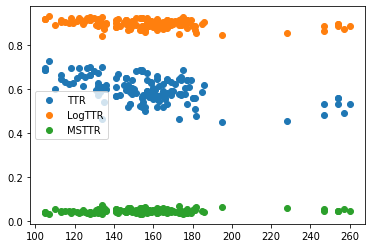

In [36]:
plt.scatter(df2['N_Splits'],df2['TTR'],  label='TTR')
plt.scatter(df2['N_Splits'],df2['LogTTR'],  label='LogTTR')
plt.scatter(df2['N_Splits'],df2['MSTTR'],  label='MSTTR')
plt.legend()

In [37]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.347533,0.398948,0.455743,0.072914,-0.233402,-0.731222,0.477978,-0.442621,0.015185
1,0.347533,1.000000,-0.284056,0.571003,-0.285483,0.382480,-0.362842,0.642578,0.252556,0.190047
2,0.398948,-0.284056,1.000000,-0.523649,0.152937,-0.139176,-0.092895,0.016266,-0.434016,-0.383585
3,0.455743,0.571003,-0.523649,1.000000,-0.225343,-0.227577,-0.481548,0.473286,0.279258,0.446650
4,0.072914,-0.285483,0.152937,-0.225343,1.000000,-0.104438,-0.147477,-0.523283,-0.614603,-0.189916
5,-0.233402,0.382480,-0.139176,-0.227577,-0.104438,1.000000,-0.030252,0.417640,0.205851,0.095084
6,-0.731222,-0.362842,-0.092895,-0.481548,-0.147477,-0.030252,1.000000,-0.494440,0.381407,-0.353652
7,0.477978,0.642578,0.016266,0.473286,-0.523283,0.417640,-0.494440,1.000000,0.375873,0.417863
8,-0.442621,0.252556,-0.434016,0.279258,-0.614603,0.205851,0.381407,0.375873,1.000000,0.150421
9,0.015185,0.190047,-0.383585,0.446650,-0.189916,0.095084,-0.353652,0.417863,0.150421,1.000000


In [44]:
df3

,Year,Category,QN,Passage,String,Splits,N_Splits,Lemma,TTR,RTTR,LogTTR,MSTTR,FDTTR,MATTR,HDD,MTLD,BILOG,MA
51,2019,Context,Q18,"Dear Mr. Reese,\nA few days ago, I submitted m...",578,"[Dear, Mr., Reese,, A, few, days, ago,, I, sub...",105,"[dear, mr, reese, a, few, day, ago, i, submit,...",0.685714,7.026481,0.918931,0.040110,0.810,0.766786,0.810360,83.649431,76.466667,62.060588
34,2020,Context,Q18,"Dear Mr. Reese,\nA few days ago, I submitted m...",578,"[Dear, Mr., Reese,, A, few, days, ago,, I, sub...",105,"[dear, mr, reese, a, few, day, ago, i, submit,...",0.685714,7.026481,0.918931,0.040110,0.810,0.766786,0.810360,83.649431,76.466667,62.060588
17,2021,Context,Q18,"Dear Friends,\nSeason_s greetings. As some of ...",611,"[Dear, Friends,, Season_s, greetings., As, som...",105,"[dear, friend, season, greeting, as, some, of,...",0.695238,7.124071,0.921894,0.038643,0.790,0.782500,0.836292,89.071602,75.857143,52.282982
119,2015,Context,Q18,One difference between winners and losers is h...,635,"[One, difference, between, winners, and, loser...",107,"[one, difference, between, winner, and, loser,...",0.728972,7.540545,0.932349,0.033336,0.790,0.794828,0.841506,110.542069,107.811321,0.000000
0,2022,Context,Q18,"Dear Ms. Green,\nMy name is Donna Williams, a ...",637,"[Dear, Ms., Green,, My, name, is, Donna, Willi...",110,"[dear, ms, green, my, name, be, donna, william...",0.600000,6.292853,0.891325,0.053236,0.790,0.763279,0.782583,71.694409,63.127273,57.933236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2019,Context,Q41,"Industrial capitalism not only created work, i...",1608,"[Industrial, capitalism, not, only, created, w...",254,"[industrial, capitalism, not, only, create, wo...",0.559055,8.909872,0.894984,0.043669,0.796,0.789366,0.822339,79.721184,84.039370,74.195627
7,2022,Context,Q41,Classifying things together into groups is som...,1429,"[Classifying, things, together, into, groups, ...",254,"[classify, thing, together, into, group, be, s...",0.531496,8.470653,0.885855,0.047465,0.756,0.742439,0.783105,58.513907,59.295276,53.015209
41,2020,Context,Q41,"Industrial capitalism not only created work, i...",1608,"[Industrial, capitalism, not, only, created, w...",254,"[industrial, capitalism, not, only, create, wo...",0.559055,8.909872,0.894984,0.043669,0.796,0.789366,0.822339,79.721184,84.039370,74.195627
126,2015,Context,Q41,Increased size affects group life in a number ...,1540,"[Increased, size, affects, group, life, in, a,...",257,"[increase, size, affect, group, life, in, a, n...",0.494163,7.922042,0.872972,0.052710,0.752,0.758558,0.786371,59.559458,57.607004,56.914059


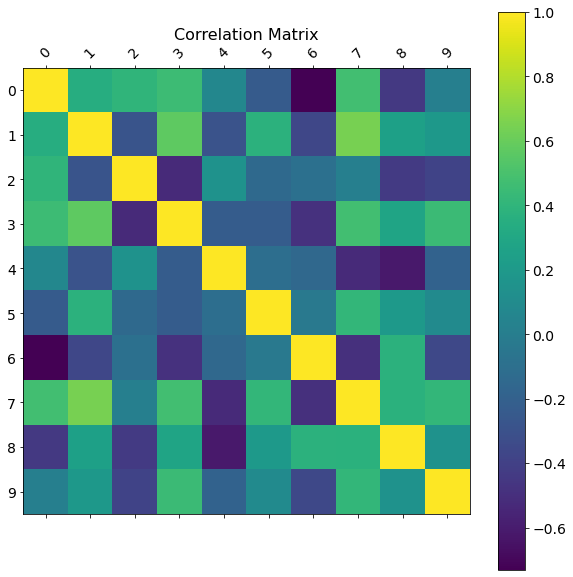

In [ ]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [41]:
df

,0,1,2,3,4,5,6,7,8,9
0,0.548814,0.715189,0.602763,0.544883,0.423655,0.645894,0.437587,0.891773,0.963663,0.383442
1,0.791725,0.528895,0.568045,0.925597,0.071036,0.087129,0.020218,0.832620,0.778157,0.870012
2,0.978618,0.799159,0.461479,0.780529,0.118274,0.639921,0.143353,0.944669,0.521848,0.414662
3,0.264556,0.774234,0.456150,0.568434,0.018790,0.617635,0.612096,0.616934,0.943748,0.681820
4,0.359508,0.437032,0.697631,0.060225,0.666767,0.670638,0.210383,0.128926,0.315428,0.363711
5,0.570197,0.438602,0.988374,0.102045,0.208877,0.161310,0.653108,0.253292,0.466311,0.244426
6,0.158970,0.110375,0.656330,0.138183,0.196582,0.368725,0.820993,0.097101,0.837945,0.096098
7,0.976459,0.468651,0.976761,0.604846,0.739264,0.039188,0.282807,0.120197,0.296140,0.118728
8,0.317983,0.414263,0.064147,0.692472,0.566601,0.265389,0.523248,0.093941,0.575946,0.929296
9,0.318569,0.667410,0.131798,0.716327,0.289406,0.183191,0.586513,0.020108,0.828940,0.004695


In [50]:
# df4 = df3.iloc[:, [6,8,9,10,11,12,13,14,15,16,17]]

In [48]:
# import seaborn as sns; sns.set_theme()